<p><big>Understanding the relationship between music Popularity and other criteria - Valence, Energy and Danceability</big></p>
</body>

In [1]:
#Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

#genre_df = Spotify Dataset 1921-2020, 160k+ Tracks
genre_df = pd.read_csv("../Datasets/data_by_genres.csv")

#Create dataframe and sort by Popularity
genres_popularity=genre_df[["genres","popularity","valence"]]
genres_popularity=genres_popularity.sort_values(by="popularity", ascending=False)
genres_energy=genre_df[["genres","energy","danceability","popularity","valence"]]
genres_energy=genres_energy.sort_values(by="popularity", ascending=False)

#Based on df's satistical shape, we define the third percentile of Popularity as the threshold to define the data we analyze,
#as we want to focus on most popular music.
genres_energy.describe()

,energy,danceability,popularity,valence
count,2664.000000,2664.000000,2664.000000,2664.000000
mean,0.564704,0.536555,40.119079,0.499293
std,0.227515,0.148557,16.018515,0.197600
min,0.002825,0.059851,0.000000,0.004886
25%,0.403441,0.445851,33.000000,0.362073
50%,0.600476,0.544778,43.000000,0.508720
75%,0.733009,0.643117,50.879969,0.638521
max,0.999500,0.957333,82.000000,0.980000


In [2]:
#Filter df to get only genres with over 50.9 Popularity
genres_energy = genres_energy[genres_energy['popularity'] > 50.9]  

generes_energy_fil = genres_energy.reset_index()
generes_energy_fil.head(100)

,index,genres,energy,danceability,popularity,valence
0,512,circuit,0.972000,0.745000,82.000000,0.556000
1,1118,guaracha,0.972000,0.745000,82.000000,0.556000
2,2141,russian dance,0.945000,0.653000,79.000000,0.326000
3,34,afroswing,0.564667,0.697292,77.625000,0.701125
4,2104,ritmo kombina,0.578333,0.845000,77.333333,0.505333
...,...,...,...,...,...,...
95,1419,k-pop girl group,0.844040,0.729156,63.675769,0.674597
96,2511,uk hip hop,0.652044,0.701844,63.544762,0.528890
97,2377,swedish tropical house,0.503000,0.650500,63.500000,0.223500
98,2384,swiss pop,0.711500,0.756500,63.500000,0.492500


In [3]:
#Add slots to store variable lists

#First, the general values for Genre, Valence, Popularity, Loudness, Danceability and Loudness divided by country

genre = []
valence = 0
popularity = 0
loudness = 0
danceability = 0
energy = 0
valences = []
popularities = []
danceabilities = []
energies = []
countries =["mexican", "australian", "argentine", "colombian", "chile", "japan", "chinese", "spanish", "canadian",
            "american", "french", "german", "russia", "indonesian", "indian", "south african", "nigerian",
           "belgian", "brazil", "british", "czech", "danish", "dutch", "greek", "icelandic", "israeli"]


#Now, set lists for Subgenres
genre_val = []
genre_dan = []
genre_ene = []
genre_pop = []
local_gen = []


#Iterate through each row and append values to each list
for country in countries:
    for i in range(len(generes_energy_fil["genres"])):
        if country in generes_energy_fil["genres"][i]:
            genre.append(generes_energy_fil["genres"][i])
            genre_val.append(generes_energy_fil["valence"][i])
            genre_pop.append(generes_energy_fil["popularity"][i])
            genre_dan.append(generes_energy_fil["danceability"][i])
            genre_ene.append(generes_energy_fil["energy"][i])
            valence += generes_energy_fil["valence"][i]
            popularity += generes_energy_fil["popularity"][i]
            danceability += generes_energy_fil["danceability"][i]
            energy += generes_energy_fil["energy"][i]
    popularities.append(popularity/len(genre))
    valences.append(valence/len(genre))
    danceabilities.append(danceability/len(genre))
    energies.append(energy/len(genre))

#Build new df with filtered data
countries_filtered_df = pd.DataFrame({"country": countries, "valence": valences, "popularity": popularities,
                            "danceability": danceabilities, "energy": energies})

#Sort df by Popularity
countries_sort = countries_filtered_df.sort_values(by=['popularity'], ascending=False)

In [4]:
#Create a df focused on subgenres per country (local genres)
local_df = pd.DataFrame({"genre": genre, "valence": genre_val, "danceability": genre_dan,
                        "popularity": genre_pop, "energy": genre_ene})

#Find local genres first percentile to stablish as filtering threshold
local_df.describe()

,valence,danceability,popularity,energy
count,125.000000,125.000000,125.000000,125.000000
mean,0.482294,0.608287,58.133037,0.632467
std,0.176806,0.132868,6.274016,0.181474
min,0.076400,0.244000,50.958333,0.089970
25%,0.363750,0.534883,53.833333,0.540496
50%,0.491810,0.618213,56.203704,0.655367
75%,0.596511,0.700500,61.000000,0.743270
max,0.888000,0.906000,79.000000,0.987500


In [5]:
#Store values for first df filtered by subgenres per country. Focus on the countries where we have Billboard's (hit music) data
#and Spotify'datasets.
mex_genres = local_df.query('genre.str.contains("mexican")')[local_df['popularity'] > 50.9]
arg_genres = local_df.query('genre.str.contains("argentine")')[local_df['popularity'] > 50.9]
aus_genres = local_df.query('genre.str.contains("australian")')[local_df['popularity'] > 50.9]
jpn_genres = local_df.query('genre.str.contains("japan")')[local_df['popularity'] > 50.9]
can_genres = local_df.query('genre.str.contains("canadian")')[local_df['popularity'] > 50.9]
ger_genres = local_df.query('genre.str.contains("german")')[local_df['popularity'] > 50.9]


<ipython-input-5-31b3f976c1b5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mex_genres = local_df.query('genre.str.contains("mexican")')[local_df['popularity'] > 50.9]
<ipython-input-5-31b3f976c1b5>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arg_genres = local_df.query('genre.str.contains("argentine")')[local_df['popularity'] > 50.9]
<ipython-input-5-31b3f976c1b5>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aus_genres = local_df.query('genre.str.contains("australian")')[local_df['popularity'] > 50.9]
<ipython-input-5-31b3f976c1b5>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  jpn_genres = local_df.query('genre.str.contains("japan")')[local_df['popularity'] > 50.9]
<ipython-input-5-31b3f976c1b5>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  can_genres = local_df.query('genre.str.contains("canadian")')[local_d

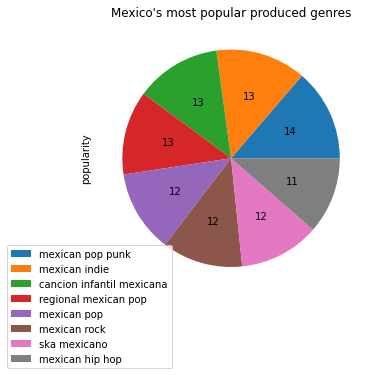

In [6]:
#Plot pie charts to see distribution on most popular produced genres
#Mexico's pie chart
mex_pie = mex_genres["popularity"].plot.pie(y="genres", figsize=(5, 5), autopct='%.0f', labels=None)
plt.legend(mex_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Mexico's most popular produced genres")
plt.savefig("../Plots/mex-popular-produced")

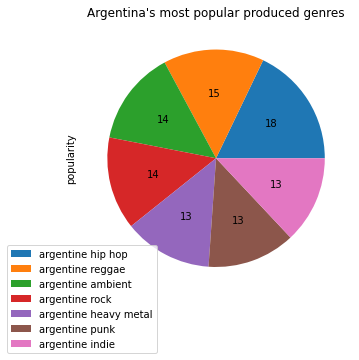

In [7]:
#Argentina's pie chart
arg_pie = arg_genres["popularity"].plot.pie(y="genres", figsize=(5, 5), autopct='%.0f', labels=None)
plt.legend(arg_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Argentina's most popular produced genres")
plt.savefig("../Plots/arg-popular-produced")

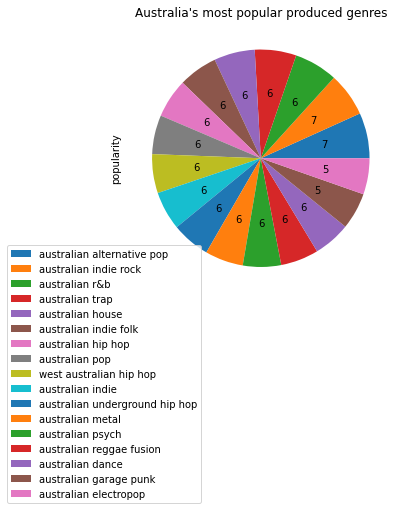

In [8]:
#Australia's pie chart
aus_pie = aus_genres["popularity"].plot.pie(y="genres", figsize=(5, 5), autopct='%.0f', labels=None)
plt.legend(aus_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Australia's most popular produced genres")
plt.savefig("../Plots/aus-popular-produced")

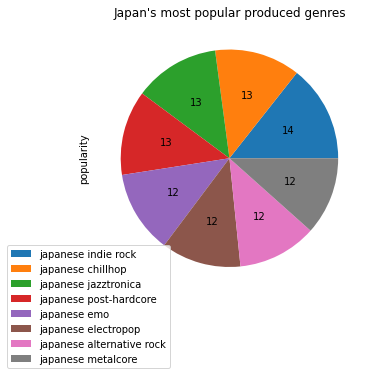

In [9]:
#Japan's pie chart
jpn_pie = jpn_genres["popularity"].plot.pie(y="genres", figsize=(5, 5), autopct='%.0f', labels=None)
plt.legend(jpn_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Japan's most popular produced genres")
plt.savefig("../Plots/jpn-popular-produced")

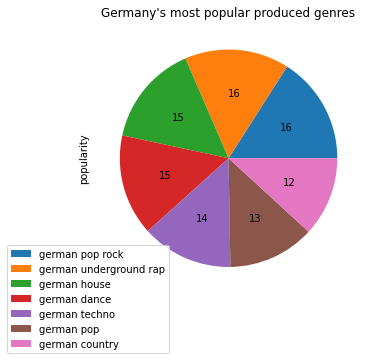

In [10]:
#Germany's pie chart
ger_pie = ger_genres["popularity"].plot.pie(y="genres", figsize=(5, 5),autopct='%.0f', labels=None)
plt.legend(ger_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Germany's most popular produced genres")
plt.savefig("../Plots/ger-popular-produced")

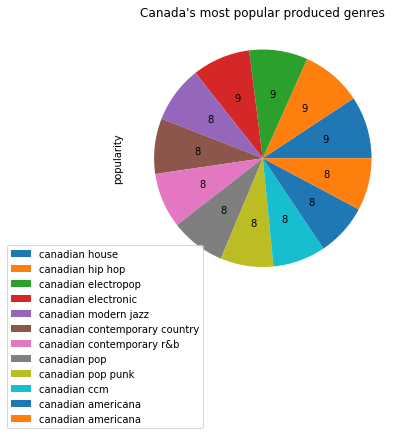

In [11]:
#Canada's pie chart
can_pie = can_genres["popularity"].plot.pie(y="genres", figsize=(5, 5),autopct='%.0f', labels=None)
plt.legend(can_genres["genre"],bbox_to_anchor=(0.30, 0.20))
plt.title("Canada's most popular produced genres")
plt.savefig("../Plots/can-popular-produced")

In [12]:
#Integrate most popular music per country features (Danceability, Energy, Loudnes and Valence) based on Billboard's
#International charts from 2019-20, focused on the countries listed next.

#Set variables to scan through the csv files
countries = ["ARG","MEX","AUS", "CAN", "ESP", "FRA", "GBP", "GER", "ITA","SUI","EUR", "JPN", "KOR"]
col_list = ["danceability", "energy", "valence", "loudness"]
files_name=[]
by_nationality=[]

#Define a function to crawl the csv's and define variables for each country containing Danceability, Energy and Valence
#criteria and store them in by_nationality.

for x in countries:
    file=f'../Datasets/Billboard International Charts (2019-Aug 2020)/{x}.csv'
    if x=="ARG":        
        ar_con = ARG=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="AUS":      
        au_con = AUS=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="CAN":
        ca_con = CAN=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="ESP":
        es_con = ESP=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="EUR":
        eu_con = EUR=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="FRA":
        fr_con = FRA=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="GBP":
        gb_con = GBP=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="GER":
        gr_con = GER=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="ITA":
        it_con = ITA=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="JPN":
        jp_con = JPN=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="KOR":
        ko_con = KOR=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="MEX":
        mx_con = MEX=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())
    elif x=="SUI":
        su_con = SUI=by_nationality.append((pd.DataFrame(pd.read_csv(file,usecols=col_list)
                                   [col_list])).mean())


In [13]:
#Create a df with the list items storer under by nationality
by_nat = pd.DataFrame(by_nationality, index=countries)

#Reset index to match with the Production df columns
by_nat = by_nat.rename(index={'ARG': 'ARG_cons','MEX': 'MEX_cons',
                             'AUS' : 'AUS_cons', 'CAN' : 'CAN_cons',
                             'GBP' : 'GBP_cons', 'GER' : 'GER_cons',
                             'JPN' : 'JPN_cons'})
#Turn negative Db to positive values
by_nat = by_nat.abs()

In [14]:
#Homologate production (countries_df) shape to match consumption (by_nat)
new_countries_df = countries_filtered_df.set_index('country')

#Select the columns for studied countries
new_countries_df = new_countries_df.loc[['argentine', 'mexican', 'australian',
                                         'canadian', 'british', 'german','japan']]

#Reset index to match consumption df
new_countries_df = new_countries_df.rename(index={'argentine': 'ARG_prod','mexican': 'MEX_prod',
                                                 'australian' : 'AUS_prod', 'canadian' : 'CAN_prod',
                                                 'british' : 'GBP_prod', 'german' : 'GER_prod',
                                                 'japan' : 'JPN_prod'})

#Lowercase column labels to homologate with consumption df
new_countries_df.columns = new_countries_df.columns.str.lower()

#Turn negative Db to positive values
new_countries_df = new_countries_df.abs()

In [15]:
#Merge both df to plot comparissons. Drop criteria that can't be compared (popularity, loudness)
vertical_stack = pd.concat([by_nat, new_countries_df], axis=0).drop(['popularity','loudness'], axis=1)


#Clean dataframe by dropping rows that were only present in one df and transpose it to get an easy plotting shape
vertical_stack = vertical_stack.drop(['ESP','FRA','ITA','SUI','KOR','EUR']).T

vertical_stack 


,ARG_cons,MEX_cons,AUS_cons,CAN_cons,GBP_cons,GER_cons,JPN_cons,ARG_prod,MEX_prod,AUS_prod,CAN_prod,GBP_prod,GER_prod,JPN_prod
danceability,0.768989,0.741207,0.716034,0.768575,0.718678,0.722793,0.561953,0.592584,0.627601,0.585212,0.589976,0.606839,0.600388,0.593234
energy,0.771080,0.699149,0.593791,0.570161,0.625690,0.653103,0.713662,0.638695,0.640616,0.665569,0.651744,0.639825,0.642086,0.680145
valence,0.668241,0.710977,0.521402,0.576659,0.568583,0.521989,0.496940,0.505150,0.616195,0.501861,0.500491,0.496108,0.502447,0.537638


In [16]:
#Extract each countries comparison by storing it in specified variables. This will make it easier to plot.
stack_ARG = vertical_stack[["ARG_cons", "ARG_prod"]]
stack_MEX = vertical_stack[["MEX_cons", "MEX_prod"]]
stack_AUS = vertical_stack[["AUS_cons", "AUS_prod"]]
stack_CAN = vertical_stack[["CAN_cons", "CAN_prod"]]
stack_GBP = vertical_stack[["GBP_cons", "GBP_prod"]]
stack_GER = vertical_stack[["GER_cons", "GER_prod"]]
stack_JPN = vertical_stack[["JPN_cons", "JPN_prod"]]

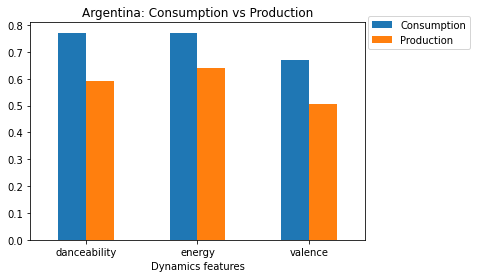

In [17]:
#Plot Argentina comparisson
ARG_bal = stack_ARG.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Argentina: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/ARG-cons-vs-prod")

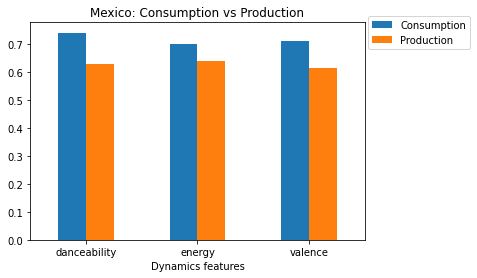

In [18]:
#Plot Mexico comparisson
MEX_bal = stack_MEX.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Mexico: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/MEX-cons-vs-prod")

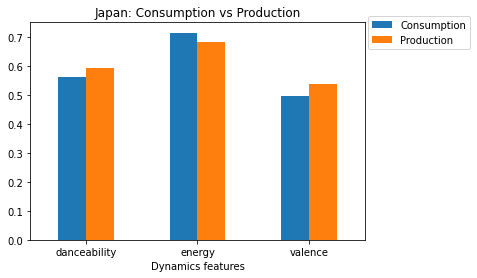

In [19]:
##Plot Japan comparisson
JPN_bal = stack_JPN.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Japan: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/JPN-cons-vs-prod")

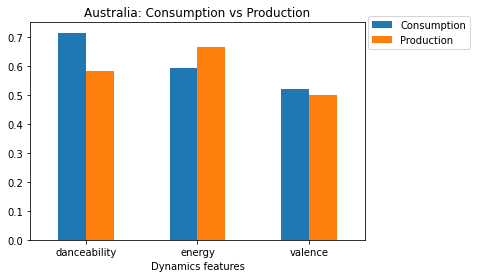

In [20]:
#Plot Australia comparisson
AUS_bal = stack_AUS.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Australia: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/AUS-cons-vs-prod")

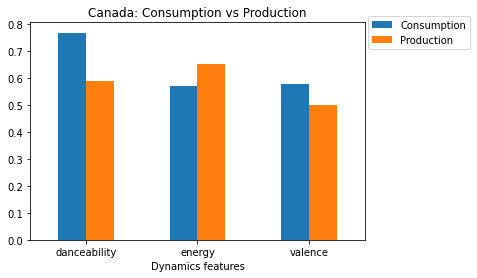

In [21]:
#Plot Canada comparisson
CAN_bal = stack_CAN.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Canada: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/CAN-cons-vs-prod")

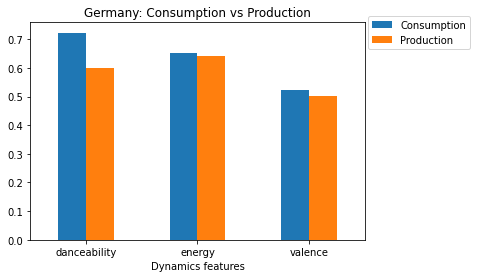

In [22]:
#Plot Germany comparisson
GER_bal = stack_GER.plot.bar(rot=0)
plt.xticks(rotation = "horizontal")
plt.title("Germany: Consumption vs Production")
plt.xlabel("Dynamics features")
plt.legend(["Consumption", "Production"],bbox_to_anchor=(1.33, 1.05))
plt.savefig("../Plots/GER-cons-vs-prod")

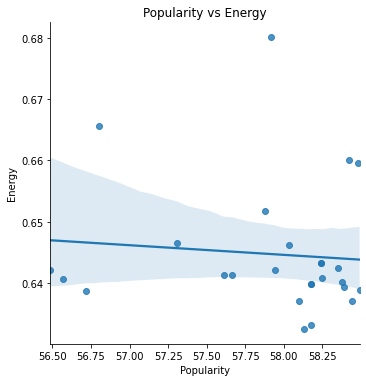

In [23]:
import seaborn as sns


sns.lmplot(x='popularity',y='energy',data=countries_sort,fit_reg=True) 

plt.title("Popularity vs Energy")
plt.xlabel("Popularity")
plt.ylabel("Energy")
plt.savefig("../Plots/Cons-popularity-vs-energy")

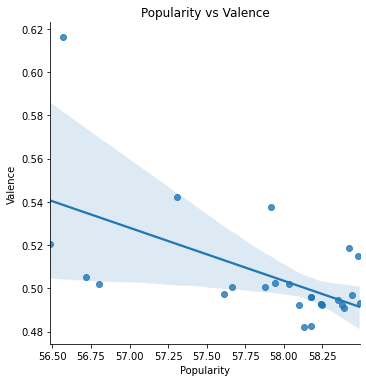

In [24]:
sns.lmplot(x='popularity',y='valence',data=countries_sort,fit_reg=True) 

plt.title("Popularity vs Valence")
plt.xlabel("Popularity")
plt.ylabel("Valence")
plt.savefig("../Plots/Cons-popularity-vs-valence")

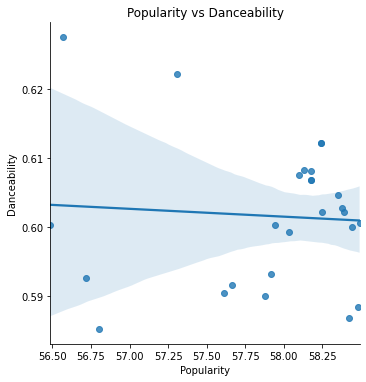

In [25]:
sns.lmplot(x='popularity',y='danceability',data=countries_sort,fit_reg=True) 

plt.title("Popularity vs Danceability")
plt.xlabel("Popularity")
plt.ylabel("Danceability")
plt.savefig("../Plots/Cons-popularity-vs-danceability")